## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.

## Task
We want to use polynomial regression to model the relationship between the independent variable \( X \) and the dependent variable \( y \).

## Dataset
We will create a synthetic dataset using the given equation. We will use this dataset to train polynomial regression models with varying degrees of polynomials. 
We will also create different test sets to evaluate the models' performance.

## Objective
We want to find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \). We will use the mean squared error (MSE) to evaluate the models' performance on different test sets.

## Plan
1. Create a synthetic dataset using the given equation.
2. Split the dataset into training and testing sets.
3. Train polynomial regression models with varying degrees of polynomials.
4. Evaluate the models' performance on different test sets using the mean squared error (MSE).
5. Find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \).



# Implementation (100 Points)
We will start by creating a synthetic dataset using the given equation.

## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-4 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5. 

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^5 + X^4 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [368]:
import numpy as np

def generate_dataset(range_start, range_end, num_samples, noise_std=5.0):
    # TODO: Generate the dataset with
    X = np.random.uniform(range_start, range_end, num_samples)
    noise = np.random.normal(0, noise_std, num_samples)
    y = 0.1 * (X ** 5) + (X ** 4) - 2 * (X ** 3) + 7 * (X ** 2) - (9 * X) + 3 + noise
    return X.reshape(-1, 1), y

In [369]:
X, y = generate_dataset(-4, -1, 1000)

## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 5 to 7.**

In [370]:
from sklearn.model_selection import train_test_split

degree = 5

# TODO: Split dataset into training and in-range testing
X_train, X_test_in_range, y_train, y_test_in_range = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Generate out-of-range testing set
X_test_out_of_range, y_test_out_of_range = generate_dataset(5, 7, len(X_test_in_range))


## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 7. You can use the `preprocessing`, `linear_model`, and `pipeline` classes of the `sklearn` library.

In [371]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def train_polynomial_regression(X, y, degree):
    # TODO: train the model based on the given degree
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)   # Fit the LinearRegression model
    return model

In [372]:
models = {}
# TODO: Put the models with different degrees in the models dict
for d in range(2, degree + 3):
    models[d] = train_polynomial_regression(X_train, y_train, d)

## 4. Model Evaluation (15 Points)
Evaluate the models on both test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.


In [373]:
from sklearn.metrics import mean_squared_error

def evaluate_models(models, X_test, y_test):
    losses = {}
    # TODO: Calculate each model's loss on the sets.
    
    losses = {}
    for degree, model in models.items():
        y_pred = model.predict(X_test)
        losses[degree] = mean_squared_error(y_test, y_pred)
    return losses

In [374]:
losses_train = evaluate_models(models, X_train, y_train)
losses_in_range = evaluate_models(models, X_test_in_range, y_test_in_range)
losses_out_of_range = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)

## 5. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and two test sets based on the model degree varying from 3 to 7. Train the model a few times to get a sense of how the results can change. 


In [375]:
# Train 5 times
losses_train_avg = {i: 0 for i in range(3, 8)}
losses_in_range_avg = {i: 0 for i in range(3, 8)}
losses_out_of_range_avg = {i: 0 for i in range(3, 8)}

for x in range(5):
    models = {}
    for d in range(3, 8):
        models[d] = train_polynomial_regression(X_train, y_train, d)
    
    losses_train = evaluate_models(models, X_train, y_train)
    losses_in_range = evaluate_models(models, X_test_in_range, y_test_in_range)
    losses_out_of_range = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)
    
    for i in range(3, 8):
        losses_train_avg[i] += np.log(losses_train[i]) / 5
        losses_in_range_avg[i] += np.log(losses_in_range[i]) / 5
        losses_out_of_range_avg[i] += np.log(losses_out_of_range[i]) / 5


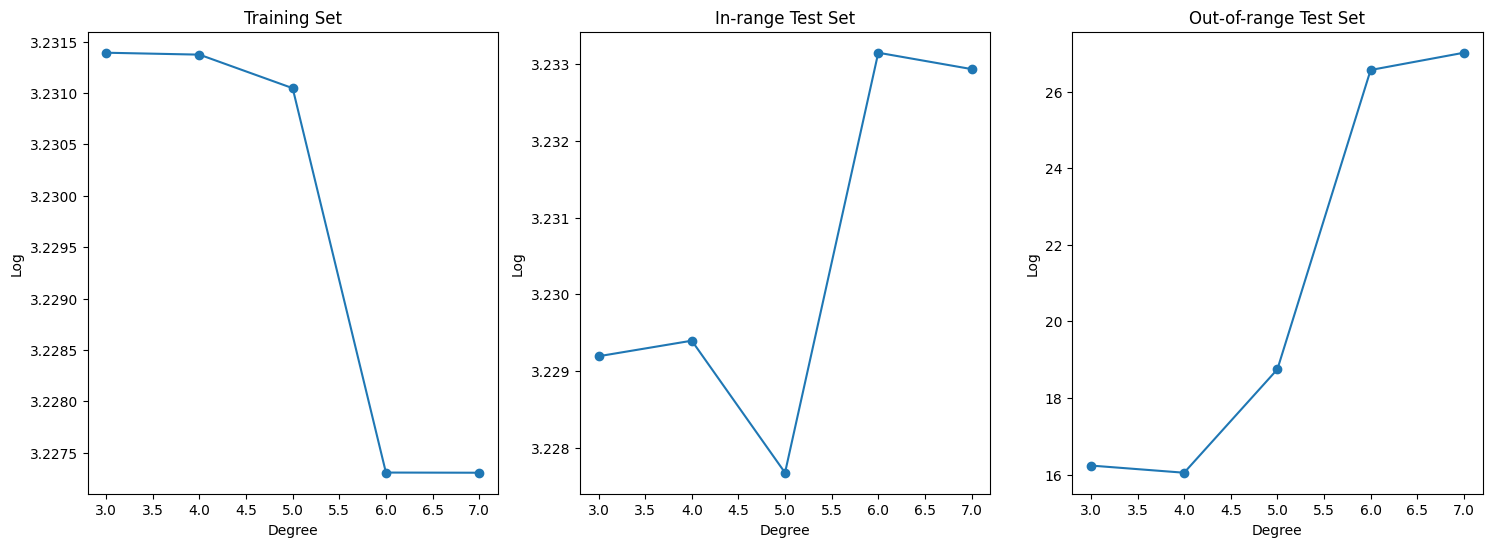

In [376]:
from matplotlib import pyplot as plt

# TODO: Plot the logarithm of loss based on the model degrees from 3 to 7

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# TODO: Plot logarithm of losses of training set
ax1.plot(range(3, 8), list(losses_train_avg.values()), marker='o', label='Training Set')
ax1.set_title('Training Set')
ax1.set_xlabel('Degree')
ax1.set_ylabel('Log')

# TODO: Plot logarithm of losses of in-range test set
ax2.plot(range(3, 8), list(losses_in_range_avg.values()), marker='o', label='In-range Test Set')
ax2.set_title('In-range Test Set')
ax2.set_xlabel('Degree')
ax2.set_ylabel('Log')

# TODO: Plot logarithm of losses of out-of-range test set
ax3.plot(range(3, 8), list(losses_out_of_range_avg.values()), marker='o', label='Out-of-range Test Set')
ax3.set_title('Out-of-range Test Set')
ax3.set_xlabel('Degree')
ax3.set_ylabel('Log')

plt.show()


## Conclusion (10 Points)

Now print out the losses on each set here. 

In [377]:
# TODO: print each model loss on the training and the two test sets
print(f'"Training set losses" :\n{losses_train}\n')
print(f'"In-range test set losses" :\n{losses_in_range}\n')
print(f'"Out-of-range test set losses" :\n{losses_out_of_range}')

"Training set losses" :
{3: 25.31484375256813, 4: 25.314372393598216, 5: 25.306112826338776, 6: 25.211689726270503, 7: 25.211649186873583}

"In-range test set losses" :
{3: 25.25926828466234, 4: 25.264386720812226, 5: 25.220966939441205, 6: 25.359352879240124, 7: 25.353948180068596}

"Out-of-range test set losses" :
{3: 11238844.14929434, 4: 9319821.623107076, 5: 138773523.04736957, 6: 344324335607.327, 7: 540534550612.0839}


With comparing the loss of **training set and the in-range test set** and also **in-range test set and the out-of-range test set**, specially in higher degrees, what we can conclude about the bias - variance trade off?

**Answer:**

Expected to explain overfitiing on the training set and also the face that model has less generalization to unseen data.

To answer this question, we check the curves and the losses that are printed in each step. As we can see, when the degree increases the training set loss decreases because the model is trained better and it is also complex. But when the degree increases, most of the time the in-range test set loss first decreases and then increases. When the degree increases, the out-of-range test set decreases at first too, but as we can see, the amount of reduction is less compared to the in-range test set, and also it starts to increase sooner. In this case the model has less generalization to unseen data. 

**Bias-variance trade off**:
In lower degrees, we have underfit so to the bias is high but because of simplicity, the variace is low. In higher degrees the model becomes more complex so the variance is higher but because of the model overfitting, bias is lower.